In [2629]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestRegressor


In [2630]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#drop index column
df_train.drop(['index'], axis = 1,inplace=True)
df_test.drop(['index'], axis = 1,inplace=True)


In [2631]:
df_train.shape, df_test.shape

((6256, 14), (1564, 14))

# Q2. Data Preprocessing and Exploratory Data Analysis

Task 1: Understanding the Dataset:

In [2632]:
df_merge = pd.concat([df_train, df_test], axis=0)

In [2633]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7820 entries, 0 to 1563
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         7820 non-null   object 
 1   Possesion       7820 non-null   object 
 2   Furnishing      7820 non-null   object 
 3   Buildup_area    7820 non-null   float64
 4   Carpet_area     7820 non-null   float64
 5   Bathrooms       7820 non-null   float64
 6   Property_age    7820 non-null   int64  
 7   Parking         7820 non-null   int64  
 8   Price           7820 non-null   int64  
 9   Brokerage       7820 non-null   float64
 10  Floor           7820 non-null   float64
 11  Per_sqft_price  7820 non-null   float64
 12  BHK             7820 non-null   float64
 13  Total_bedrooms  7820 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 916.4+ KB


In [2634]:
df_merge.columns

Index(['Address', 'Possesion', 'Furnishing', 'Buildup_area', 'Carpet_area',
       'Bathrooms', 'Property_age', 'Parking', 'Price', 'Brokerage', 'Floor',
       'Per_sqft_price', 'BHK', 'Total_bedrooms'],
      dtype='object')

In [2635]:
df_merge.nunique()

Address           3725
Possesion            1
Furnishing           3
Buildup_area      1038
Carpet_area       2893
Bathrooms          104
Property_age        46
Parking             10
Price              832
Brokerage         1785
Floor              132
Per_sqft_price    2801
BHK                  9
Total_bedrooms      32
dtype: int64

In [2636]:


categorical_features = df_merge.select_dtypes(include=['object','category']).columns.tolist()
numerical_features = []
for i in df_train.columns:
    if i not in categorical_features:
        numerical_features.append(i)

print("Categorical Features: ", categorical_features)
print("Numerical Features: ", numerical_features)


Categorical Features:  ['Address', 'Possesion', 'Furnishing']
Numerical Features:  ['Buildup_area', 'Carpet_area', 'Bathrooms', 'Property_age', 'Parking', 'Price', 'Brokerage', 'Floor', 'Per_sqft_price', 'BHK', 'Total_bedrooms']


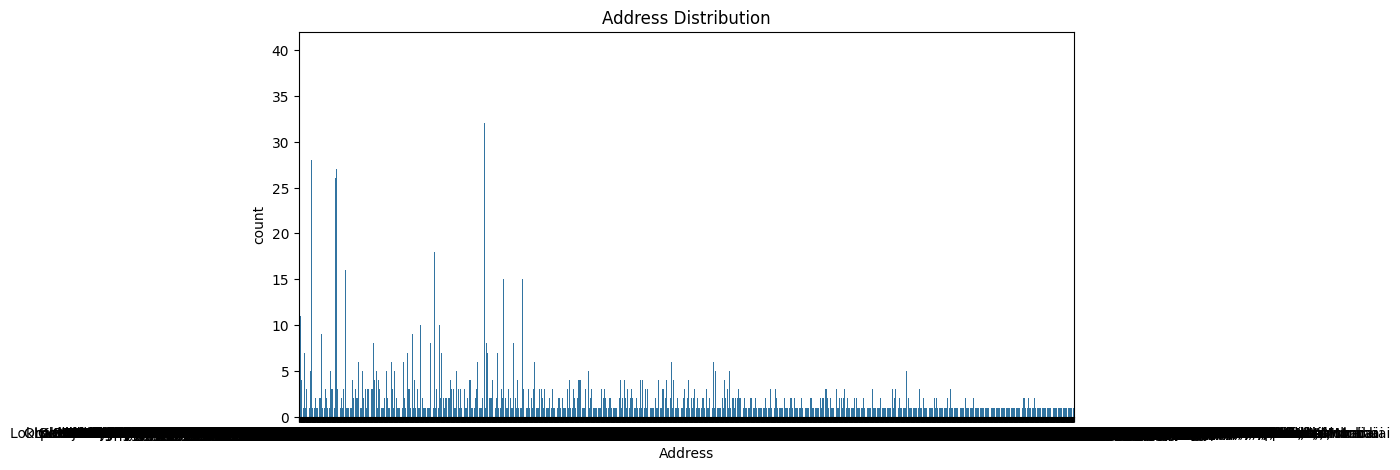

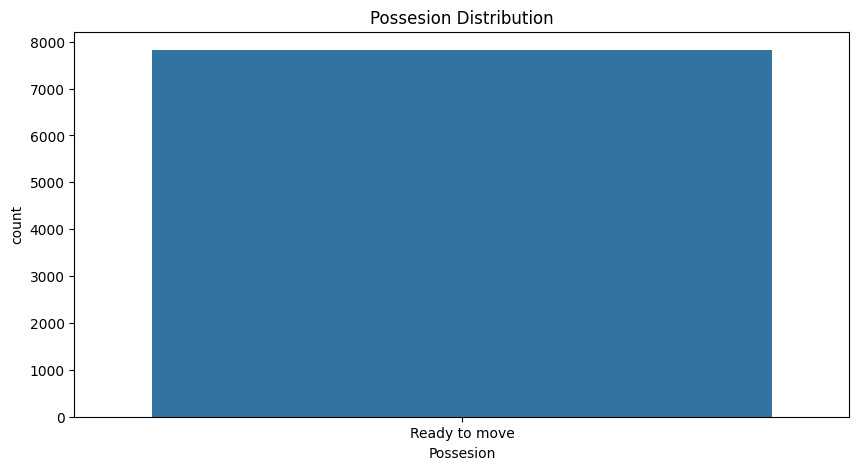

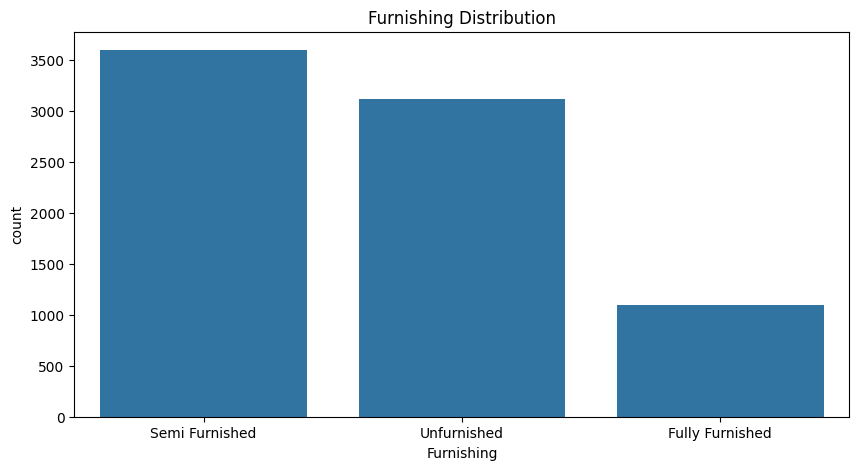

In [2637]:

def categorical_plot(df, feature):
    plt.figure(figsize=(10,5))
    plt.title(f'{feature} Distribution')
    sns.countplot(df,x = feature)
    plt.show()

for i in categorical_features:
    categorical_plot(df_merge, i)


In [2638]:
df_merge.describe()

,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
count,7820.000000,7820.000000,7820.00000,7820.000000,7820.000000,7.820000e+03,7.820000e+03,7820.000000,7820.000000,7820.000000,7820.000000
mean,1116.095505,862.095282,1.97366,7.471611,1.303581,3.038559e+07,1.131909e+07,19.930279,23401.713972,2.154923,2.201048
std,722.222240,573.311089,0.90052,7.217703,0.797048,3.719014e+07,3.102861e+07,13.960965,13000.580530,0.999940,0.979875
min,180.000000,150.000000,1.00000,1.000000,0.000000,7.800000e+05,0.000000e+00,2.000000,1440.000000,1.000000,1.000000
25%,650.000000,473.881582,1.00000,2.000000,1.000000,1.050000e+07,9.999900e+04,10.000000,15600.000000,1.000000,1.000000
50%,943.500000,707.722575,2.00000,5.000000,1.000000,1.920000e+07,2.500000e+05,16.000000,21430.000000,2.000000,2.000000
75%,1322.000000,1050.000000,2.00000,10.000000,2.000000,3.500000e+07,1.070000e+07,23.000000,28850.000000,3.000000,3.000000
max,15000.000000,14000.000000,10.00000,99.000000,9.000000,5.000000e+08,5.000000e+08,99.000000,100000.000000,10.000000,10.000000


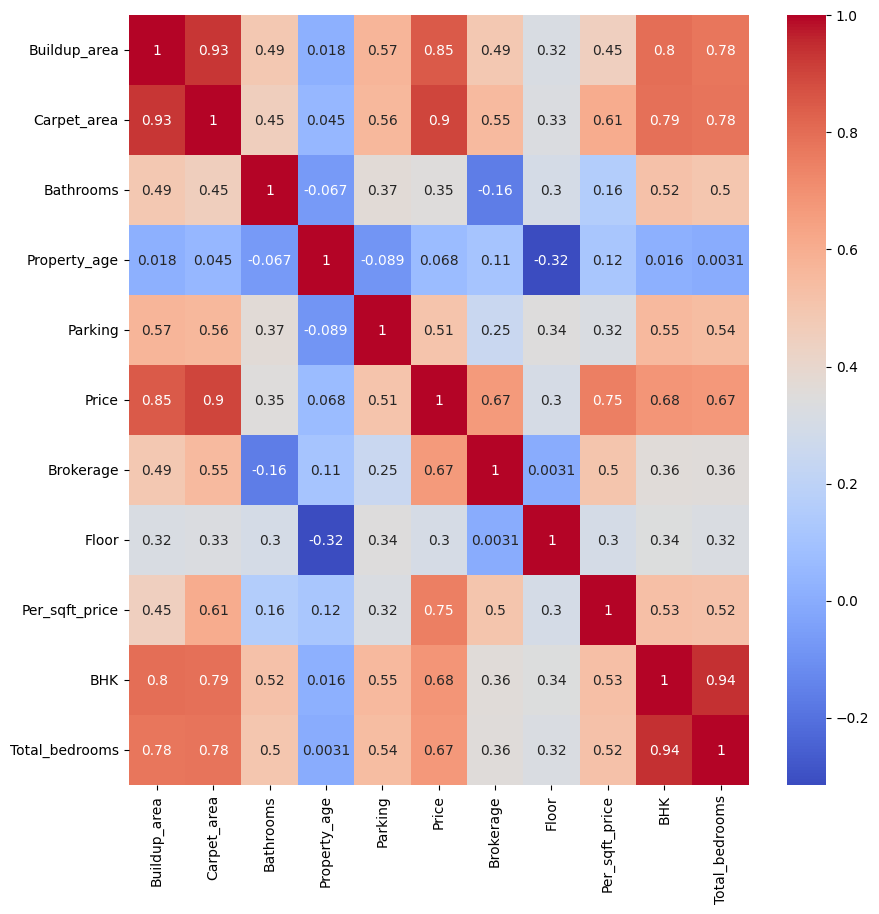

In [2639]:
# #correration heatmap
numerical_df = df_merge.select_dtypes(include=['number'])
corr = numerical_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Task 2: Drop Irrelevant Columns:

Dropping the column Possesion because every entry is 'Ready to move'

In [2640]:
df_train.drop(['Possesion'], axis = 1,inplace=True)
df_test.drop(['Possesion'], axis = 1,inplace=True)

In [2641]:
corr

,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
Buildup_area,1.000000,0.930029,0.488039,0.017737,0.571900,0.846042,0.490603,0.320851,0.449371,0.798405,0.775862
Carpet_area,0.930029,1.000000,0.451663,0.045153,0.562144,0.901236,0.550565,0.330512,0.606188,0.794149,0.779458
Bathrooms,0.488039,0.451663,1.000000,-0.067434,0.367996,0.351969,-0.163753,0.299940,0.159271,0.517814,0.499646
Property_age,0.017737,0.045153,-0.067434,1.000000,-0.088761,0.067920,0.110117,-0.315307,0.120518,0.015641,0.003148
Parking,0.571900,0.562144,0.367996,-0.088761,1.000000,0.510326,0.245893,0.344489,0.324631,0.554213,0.542660
Price,0.846042,0.901236,0.351969,0.067920,0.510326,1.000000,0.666312,0.302355,0.750540,0.684593,0.674082
Brokerage,0.490603,0.550565,-0.163753,0.110117,0.245893,0.666312,1.000000,0.003117,0.501977,0.359554,0.355426
Floor,0.320851,0.330512,0.299940,-0.315307,0.344489,0.302355,0.003117,1.000000,0.297669,0.338694,0.324051
Per_sqft_price,0.449371,0.606188,0.159271,0.120518,0.324631,0.750540,0.501977,0.297669,1.000000,0.530145,0.520536
BHK,0.798405,0.794149,0.517814,0.015641,0.554213,0.684593,0.359554,0.338694,0.530145,1.000000,0.943349


In [2642]:
corr['Price']

Buildup_area      0.846042
Carpet_area       0.901236
Bathrooms         0.351969
Property_age      0.067920
Parking           0.510326
Price             1.000000
Brokerage         0.666312
Floor             0.302355
Per_sqft_price    0.750540
BHK               0.684593
Total_bedrooms    0.674082
Name: Price, dtype: float64

In [2643]:
t = corr['Price']   #corr in on the merged dataframe
invalid_features = []
for i in numerical_features:
    if t[i] < 0.1 and t[i] > -0.1:
        invalid_features.append(i)

df_train.drop(invalid_features, axis = 1,inplace=True)
df_test.drop(invalid_features, axis = 1,inplace=True)
categorical_features.remove('Possesion')

print(invalid_features)


['Property_age']


Task 3: Encoding Categorical Features

In [2644]:
df_train.columns

Index(['Address', 'Furnishing', 'Buildup_area', 'Carpet_area', 'Bathrooms',
       'Parking', 'Price', 'Brokerage', 'Floor', 'Per_sqft_price', 'BHK',
       'Total_bedrooms'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder


for feature in categorical_features:
    le = LabelEncoder()
    le.fit(df_train[feature])
    

    df_train[feature] = le.transform(df_train[feature])
    
    df_test[feature] = df_test[feature].map(dict(zip(le.classes_, le.transform(le.classes_)))).fillna(-1)
    
 

Task 4: Feature Scaling:

In [2646]:
#standardize the data
Y_train = df_train['Price']
Y_test = df_test['Price']


X_train = df_train.drop(['Price'], axis = 1)
X_test = df_test.drop(['Price'], axis = 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_unscaled = X_train.copy().to_numpy()
X_test_unscaled = X_test.copy().to_numpy()


Task 5: Target Variable Imbalance Detection:

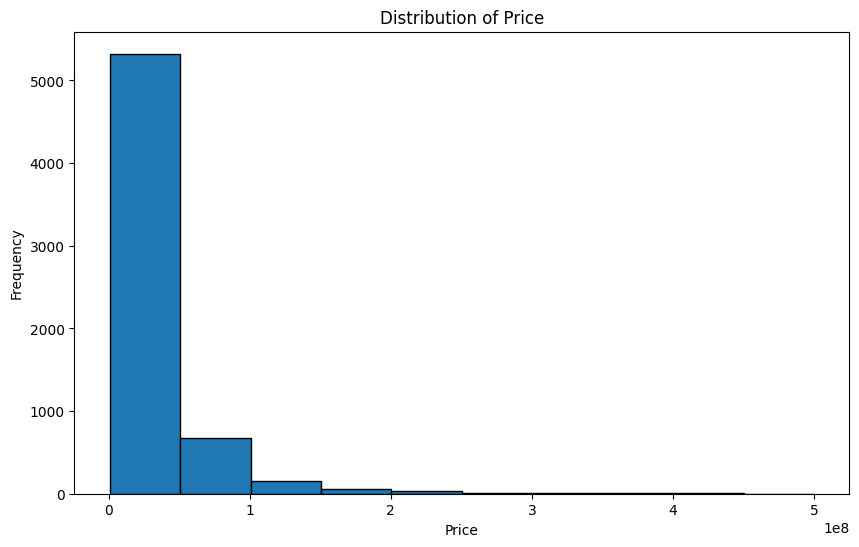

In [2647]:

plt.figure(figsize=(10, 6))
plt.hist(df_train['Price'], bins=10, edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [2648]:
ranges = [0, 0.5e8, 1e8, 1.5e8, np.inf] 
labels = ['Low', 'Medium', 'High', 'Very High']

def categorize(Y_in):
    Y = Y_in.copy()
    Y = Y.astype(object)

    for index, value in enumerate(Y):
        for j in range(len(ranges) - 1):
            if ranges[j] <= value < ranges[j+1]:
                Y[index] = labels[j]
                break
    # print(Y)
    return Y


# Y_train_categories = Y_train.copy()
# Y_test_categories = Y_test.copy()

# Y_train_categories=Y_train_categories.astype(object)
# Y_test_categories=Y_test_categories.astype(object)

Y_train_categories = categorize(Y_train)
Y_test_categories = categorize(Y_test)

# # Manual assignment using indices
# for idx, value in enumerate(Y_train_categories):
#     for j in range(len(ranges) - 1):
#         if ranges[j] <= value < ranges[j+1]:
#             Y_train_categories[idx] = labels[j]
#             break

# for idx, value in enumerate(Y_test_categories):
#     for j in range(len(ranges) - 1):
#         if ranges[j] <= value < ranges[j+1]:
#             Y_test_categories[idx] = labels[j]
#             break

# for idx, value in enumerate(Y_train):
#     if(value==np.nan):
#         print(idx)

In [ ]:
def sampling_plot(l, title):
    # Get counts of each category
    category_counts = l.value_counts()
    # print(category_counts)

    plt.figure(figsize=(8, 6))
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')


    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    plt.tight_layout()
    plt.show()

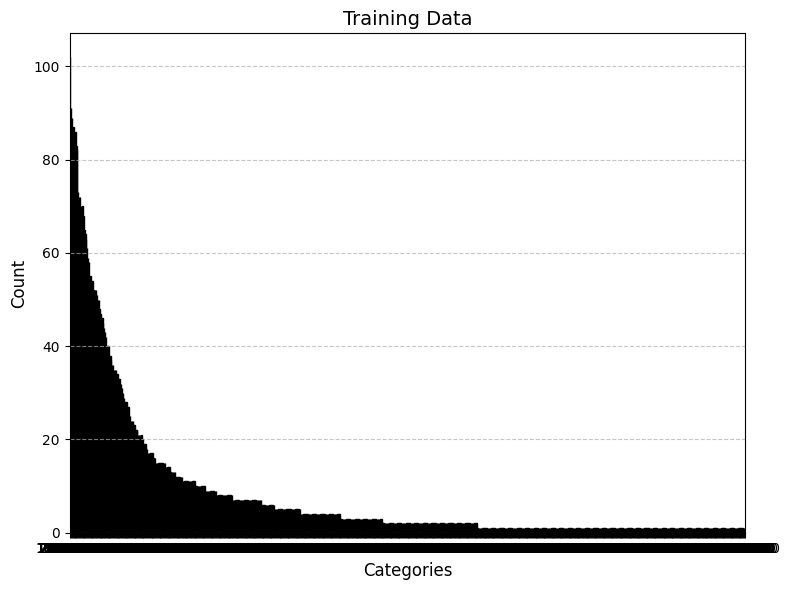

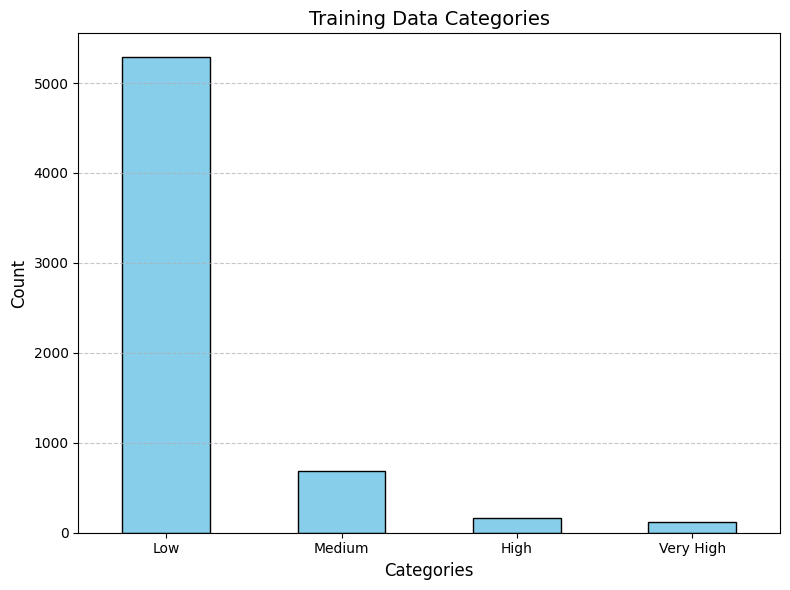

In [2667]:
sampling_plot(Y_train, 'Training Data')
sampling_plot(Y_train_categories, 'Training Data Categories')

# sampling_plot(Y_test, 'Test Data')
# sampling_plot(Y_test_categories, 'Test Data Categories')

Task 6: Handling Imbalanced Data:

In [2651]:
mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

def undersample_func(X_train, Y_train):

    X_train_df = pd.DataFrame(X_train, columns=[f'Feature{i}' for i in range(X_train.shape[1])])
    

    X_train_new = pd.concat([X_train_df, Y_train.reset_index(drop=True)], axis=1)
    

    undersample = RandomUnderSampler()
    Y_train_categories = categorize(Y_train)
    

    X_train_under, Y_train_under = undersample.fit_resample(X_train_new, Y_train_categories)
    
    return X_train_under, Y_train_under


In [ ]:


def oversample_func(X_train, Y_train):
 
    X_train_df = pd.DataFrame(X_train, columns=[f'Feature{i}' for i in range(X_train.shape[1])])
    

    X_train_new = pd.concat([X_train_df, Y_train.reset_index(drop=True)], axis=1)
    
   #  # Create the random oversampler
    oversample = RandomOverSampler()

 
   #  Y_categories= Y_train
   #  X_train_new = X_train
    Y_train_categories = categorize(Y_train)
    X_train_over, Y_train_over = oversample.fit_resample(X_train_new, Y_train_categories)
    
    return X_train_over, Y_train_over


In [2654]:
X_train_scaled_under, Y_train_scaled_under = undersample_func(X_train_scaled.copy(), Y_train)
X_train_scaled_over, Y_train_scaled_over = oversample_func(X_train_scaled.copy(), Y_train)


X_train_unscaled_under, Y_train_unscaled_under = undersample_func(X_train_unscaled.copy(), Y_train)
X_train_unscaled_over, Y_train_unscaled_over = oversample_func(X_train_unscaled.copy(), Y_train)

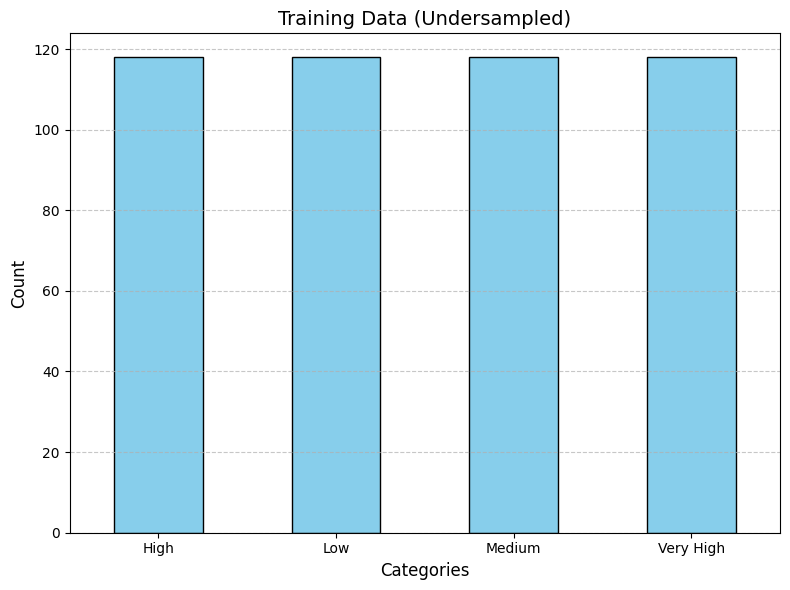

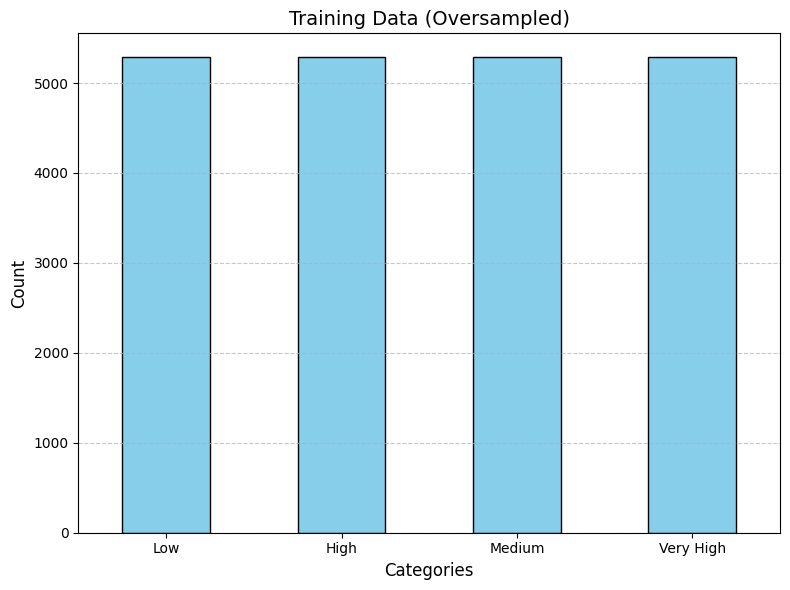

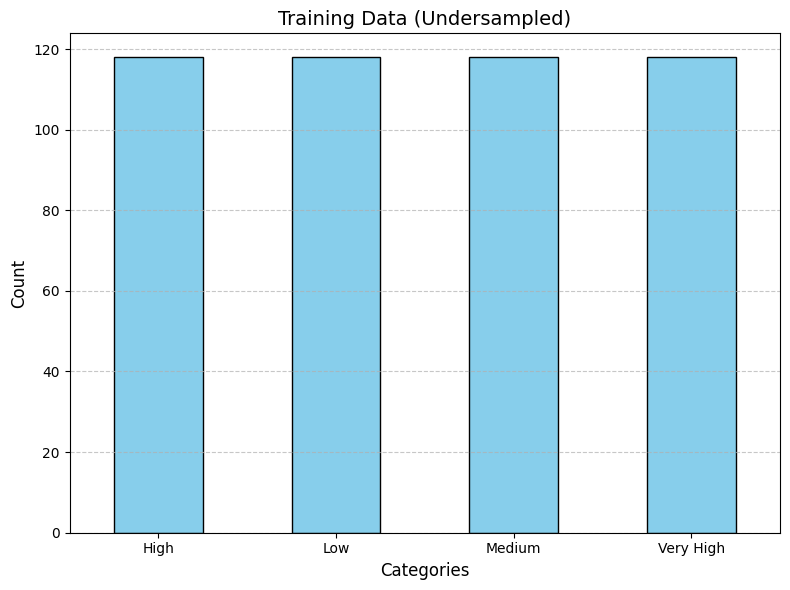

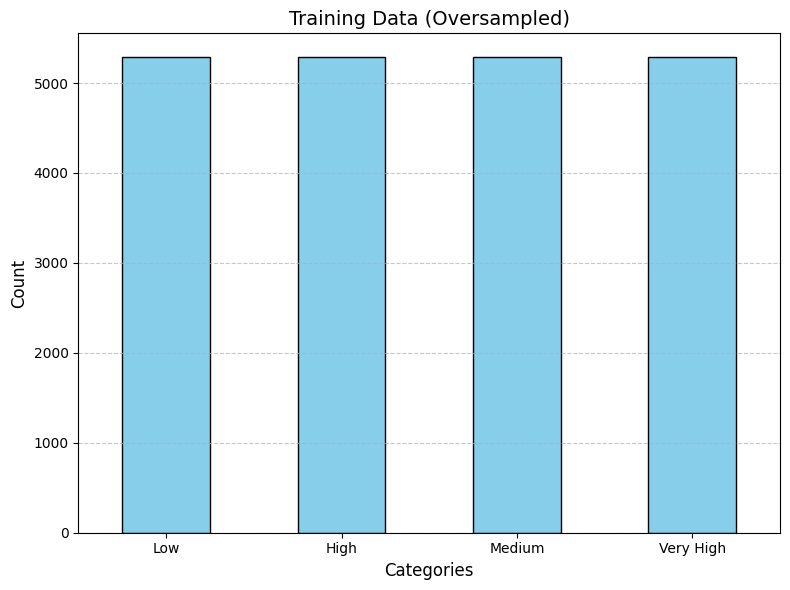

In [2655]:
sampling_plot(Y_train_scaled_under, 'Training Data (Undersampled and Scaled)')
sampling_plot(Y_train_scaled_over, 'Training Data (Oversampled and Scaled)')

sampling_plot(Y_train_unscaled_under, 'Training Data (Undersampled and Unscaled)')
sampling_plot(Y_train_unscaled_over, 'Training Data (Oversampled and Unscaled)')

# Q3. Building Decision Tree Model

Task 1: Model Training:

In [2656]:

def results(model, X_test, Y_test):
    # model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    # print(Y_pred.shape)
    # print(Y_test.shape)
    print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))
    print("R2 Score: ", r2_score(Y_test, Y_pred))

    # print("Decision Tree Score: ", model.score(X_test, Y_test))

    # return model


In [2657]:
Y_train_scaled_under = X_train_scaled_under['Price']
X_train_scaled_under = X_train_scaled_under.drop(['Price'], axis = 1)
X_train_scaled_under = X_train_scaled_under.to_numpy()

Y_train_scaled_over = X_train_scaled_over['Price']
X_train_scaled_over = X_train_scaled_over.drop(['Price'], axis = 1)
X_train_scaled_over = X_train_scaled_over.to_numpy()

Y_train_unscaled_under = X_train_unscaled_under['Price']
X_train_unscaled_under = X_train_unscaled_under.drop(['Price'], axis = 1)
X_train_unscaled_under = X_train_unscaled_under.to_numpy()

Y_train_unscaled_over = X_train_unscaled_over['Price']
X_train_unscaled_over = X_train_unscaled_over.drop(['Price'], axis = 1)
X_train_unscaled_over = X_train_unscaled_over.to_numpy()


In [2658]:
print("Decision Tree Regressor Results for Random Undersampling on scaled data")
dt1 = DecisionTreeRegressor()
dt1.fit(X_train_scaled_under, Y_train_scaled_under)
results(dt1, X_test_scaled, Y_test)
print()
print("Decision Tree Regressor Results for Random Oversampling on scaled data")
dt2 = DecisionTreeRegressor()
dt2.fit(X_train_scaled_over, Y_train_scaled_over)
results(dt2, X_test_scaled, Y_test)
print()
print("Decision Tree Regressor Results for Random Undersampling on unscaled data")
dt1_unscaled = DecisionTreeRegressor()
dt1_unscaled.fit(X_train_unscaled_under, Y_train_unscaled_under)
results(dt1_unscaled, X_test_unscaled, Y_test)

print()

print("Decision Tree Regressor Results for Random Oversampling on unscaled data")
dt2_unscaled = DecisionTreeRegressor()
dt2_unscaled.fit(X_train_unscaled_over, Y_train_unscaled_over)

results(dt2_unscaled, X_test_unscaled, Y_test)


Decision Tree Regressor Results for Random Undersampling on scaled data
Mean Squared Error:  76416474593350.39
Mean Absolute Error:  4183704.603580563
R2 Score:  0.9345900212423094

Decision Tree Regressor Results for Random Oversampling on scaled data
Mean Squared Error:  8602279012787.724
Mean Absolute Error:  994694.3734015345
R2 Score:  0.9926367332373229

Decision Tree Regressor Results for Random Undersampling on unscaled data
Mean Squared Error:  45142072249360.62
Mean Absolute Error:  3854152.1739130435
R2 Score:  0.9613598768770504

Decision Tree Regressor Results for Random Oversampling on unscaled data
Mean Squared Error:  9433163941176.47
Mean Absolute Error:  1009392.5831202046
R2 Score:  0.9919255231768588


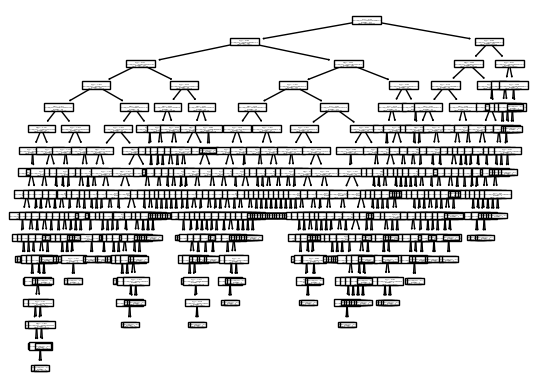

In [2668]:
tree.plot_tree(dt1,feature_names=None, class_names=None)
plt.show()

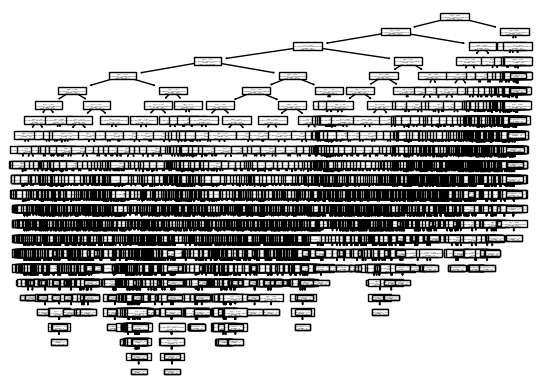

In [2669]:
tree.plot_tree(dt2)
plt.show()

Task 2: Feature Importance and Hyperparameter Tuning:

In [ ]:
def feature_importance_plot(model, sampling):
    importances = model.feature_importances_
    d = {'feature': X_train.columns, 
         'importance': importances
         }
    
    feature_importance = pd.DataFrame(data=d)
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)

    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importances in Decision Tree '+sampling)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    

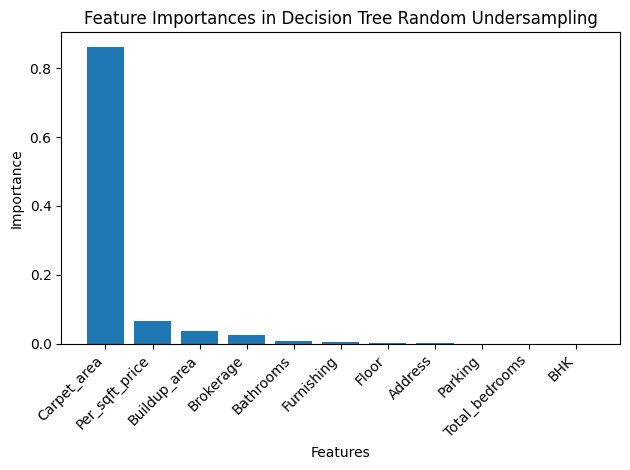

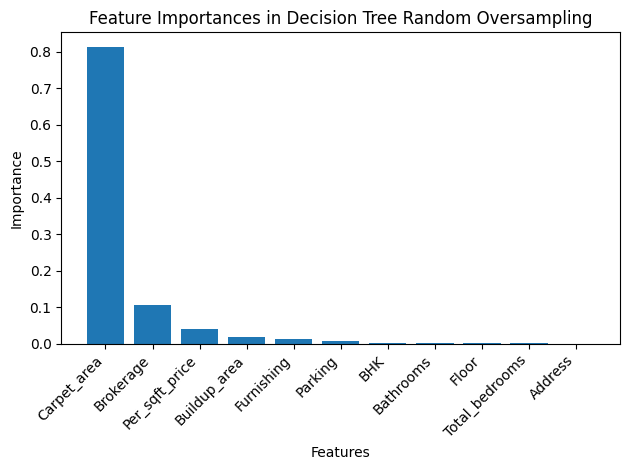

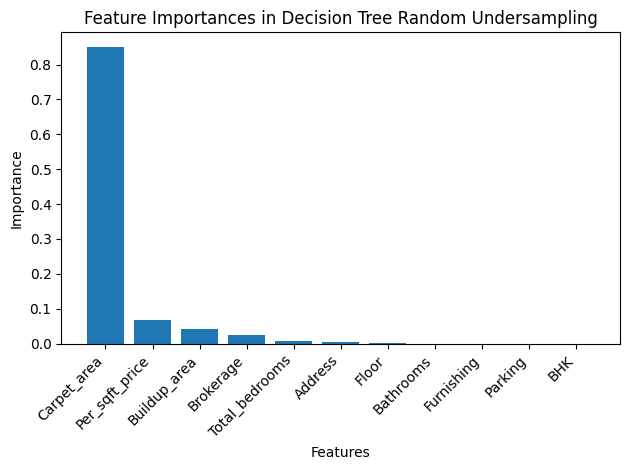

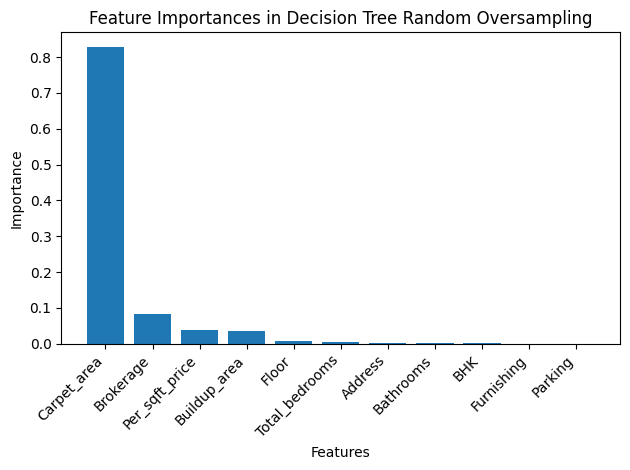

In [2662]:
feature_importance_plot(dt1, 'Random Undersampling')
feature_importance_plot(dt2, 'Random Oversampling')

feature_importance_plot(dt1_unscaled, 'Random Undersampling')
feature_importance_plot(dt2_unscaled, 'Random Oversampling')

In [2671]:
#grid search

def grid_search(model, param_grid,X_train, Y_train, X_test, Y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train)
    print(grid_search.best_params_)
    best_dt_regressor = grid_search.best_estimator_
    results(best_dt_regressor, X_test, Y_test)
    return best_dt_regressor

param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None]

}

print("Grid Search Results for Random Undersampling")
best_dt_regressor1 = grid_search(DecisionTreeRegressor(), param_grid, X_train_scaled_under, Y_train_scaled_under, X_test_scaled, Y_test)
print()
print("Grid Search Results for Random Oversampling")
best_dt_regressor2 = grid_search(DecisionTreeRegressor(), param_grid, X_train_scaled_over, Y_train_scaled_over, X_test_scaled, Y_test)
print()
print("Grid Search Results for Random Undersampling on unscaled data")
best_dt_regressor1_unscaled = grid_search(DecisionTreeRegressor(), param_grid, X_train_unscaled_under, Y_train_unscaled_under, X_test_unscaled, Y_test)
print()
print("Grid Search Results for Random Oversampling on unscaled data")
best_dt_regressor2_unscaled = grid_search(DecisionTreeRegressor(), param_grid, X_train_unscaled_over, Y_train_unscaled_over, X_test_unscaled, Y_test)


Grid Search Results for Random Undersampling
Fitting 5 folds for each of 450 candidates, totalling 2250 fits
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4}
Mean Squared Error:  88296769737691.81
Mean Absolute Error:  4471875.639386189
R2 Score:  0.9244208809206479

Grid Search Results for Random Oversampling
Fitting 5 folds for each of 450 candidates, totalling 2250 fits
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error:  8267053752557.545
Mean Absolute Error:  1017783.2480818414
R2 Score:  0.992923674989967

Grid Search Results for Random Undersampling on unscaled data
Fitting 5 folds for each of 450 candidates, totalling 2250 fits
{'max_depth': 11, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4}
Mean Squared Error:  47702386913462.17
Mean Absolute Error:  3922881.8283166112
R2 Score:  0.9591683320736153

Grid Search Results for Random Oversampling on unscaled data


Task 3: Pruning Decison Tree

In [2664]:
def prune_algo(X_train, Y_train, X_test, Y_test):
    dt = DecisionTreeRegressor()
    path = dt.cost_complexity_pruning_path(X_train, Y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    fig, ax = plt.subplots()
    ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
    ax.set_xlabel("effective alpha")
    ax.set_ylabel("total impurity of leaves")
    ax.set_title("Total Impurity vs effective alpha for training set")


    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
        clf.fit(X_train, Y_train)
        clfs.append(clf)
    print(
        "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
            clfs[-1].tree_.node_count, ccp_alphas[-1]
        )
    )

    clfs = clfs[:-1]
    ccp_alphas = ccp_alphas[:-1]

    node_counts = [clf.tree_.node_count for clf in clfs]
    depth = [clf.tree_.max_depth for clf in clfs]
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
    ax[0].set_xlabel("alpha")
    ax[0].set_ylabel("number of nodes")
    ax[0].set_title("Number of nodes vs alpha")
    ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
    ax[1].set_xlabel("alpha")
    ax[1].set_ylabel("depth of tree")
    ax[1].set_title("Depth vs alpha")
    fig.tight_layout()

    train_scores = [clf.score(X_train, Y_train) for clf in clfs]
    test_scores = [clf.score(X_test, Y_test) for clf in clfs]

    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
    ax.legend()
    plt.show()

    return dt


Pruning plots for Random Undersampling on scaled data
Number of nodes in the last tree is: 1 with ccp_alpha: 3939225061782084.0


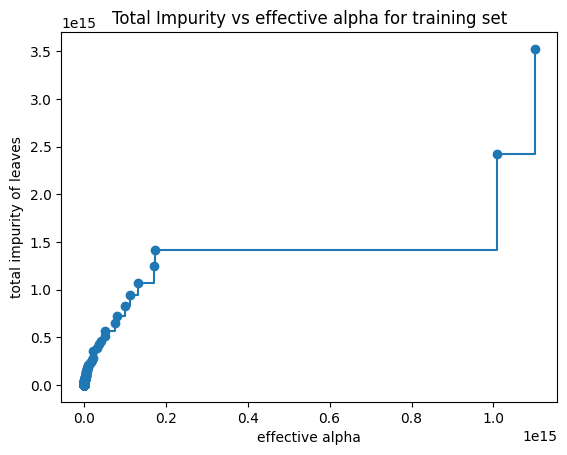

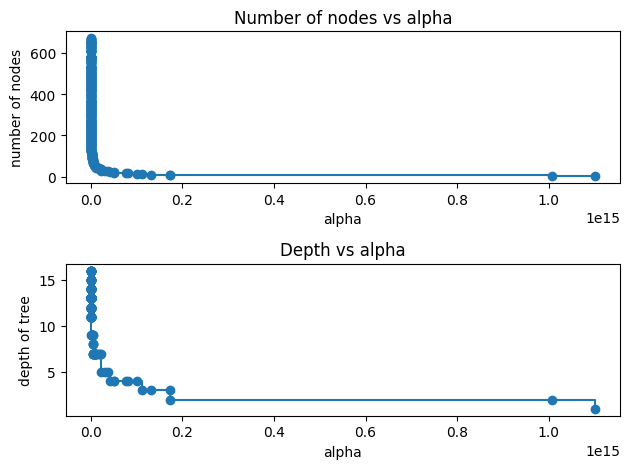

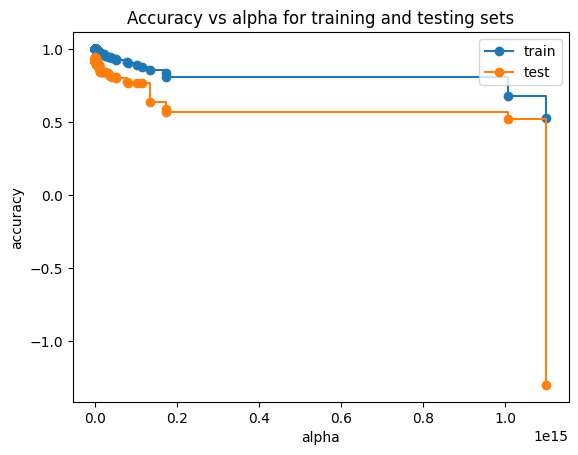

Pruning plots for Random Oversampling on scaled data
Number of nodes in the last tree is: 3 with ccp_alpha: 3851639140497974.5


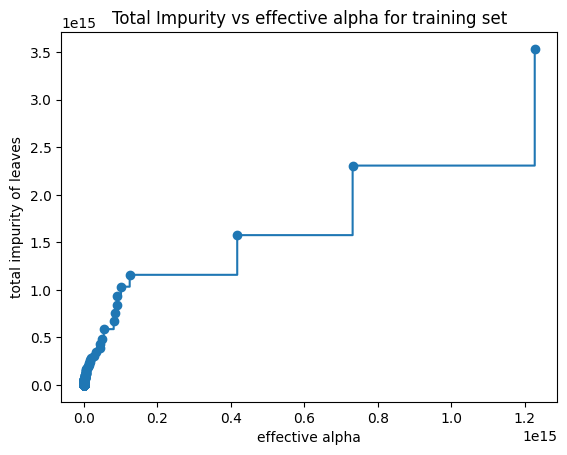

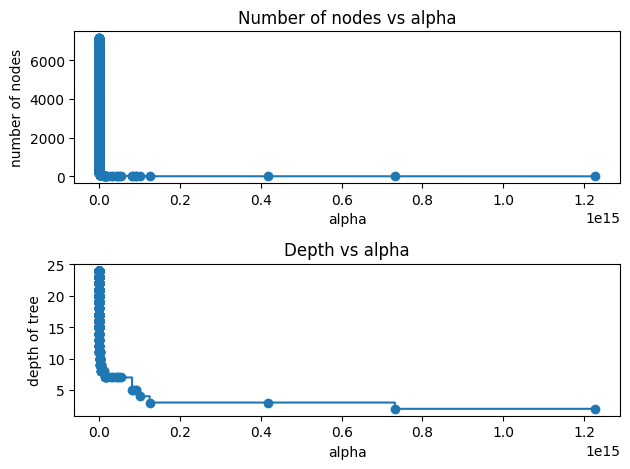

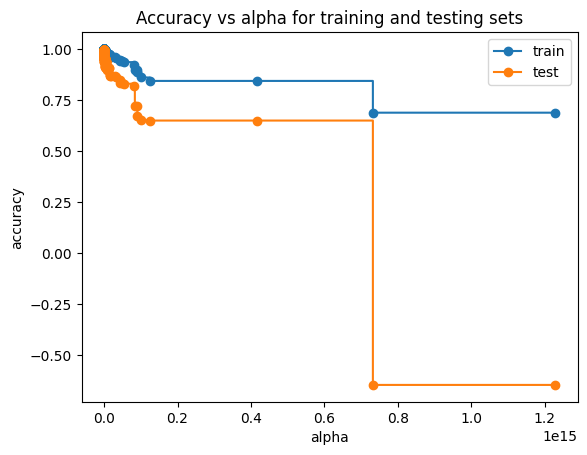

Pruning plots for Random Undersampling on unscaled data
Number of nodes in the last tree is: 1 with ccp_alpha: 3878991496782818.0


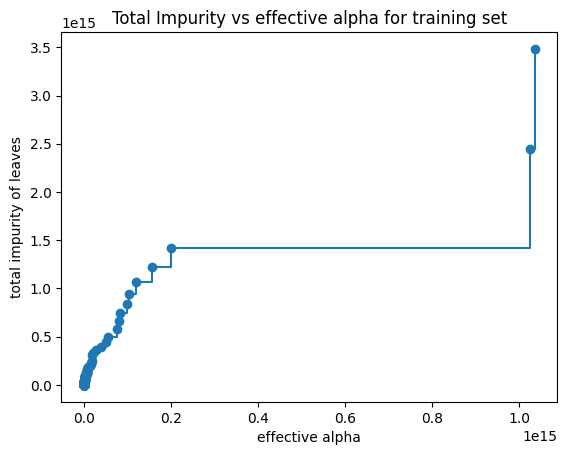

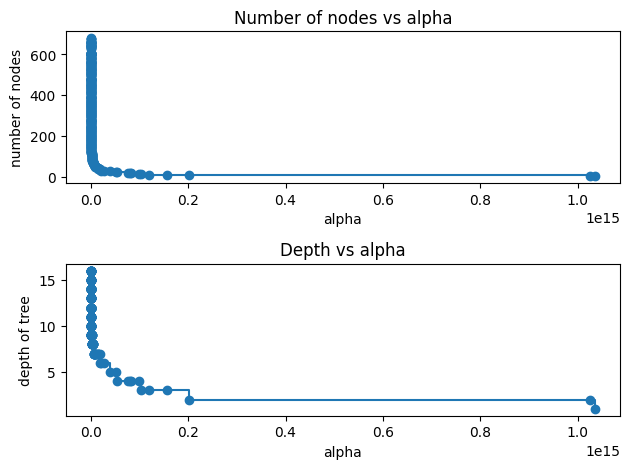

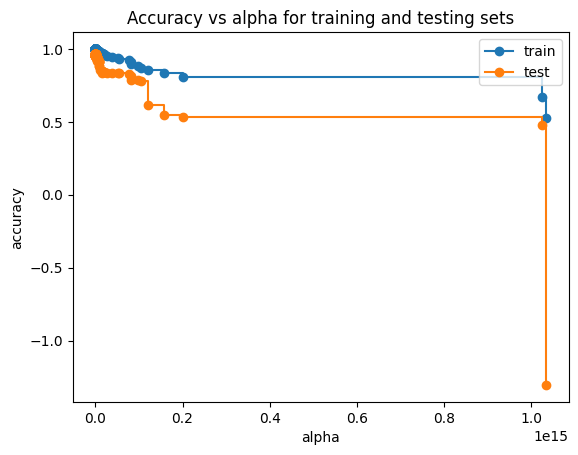

Pruning plots for Random Oversampling on unscaled data
Number of nodes in the last tree is: 1 with ccp_alpha: 3813535139082522.0


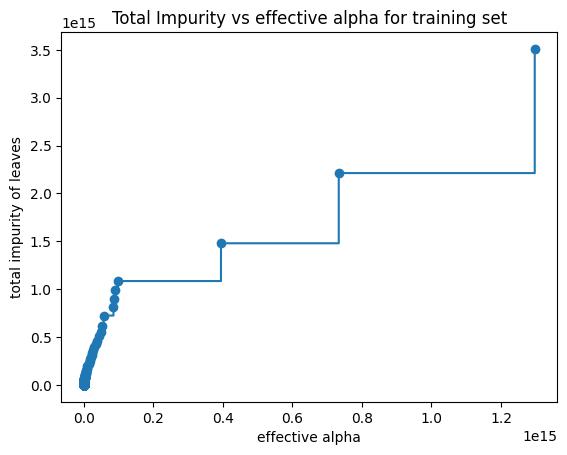

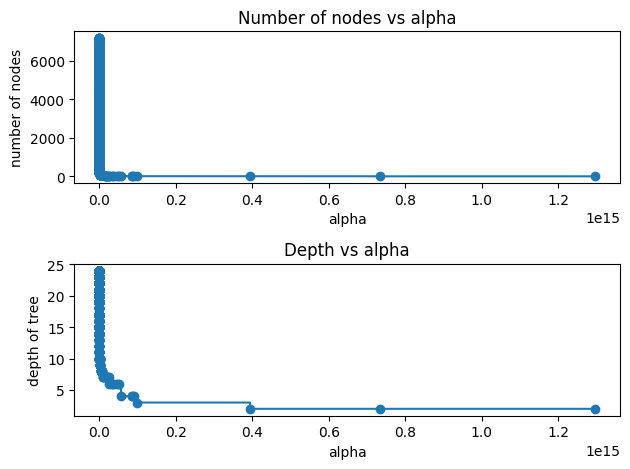

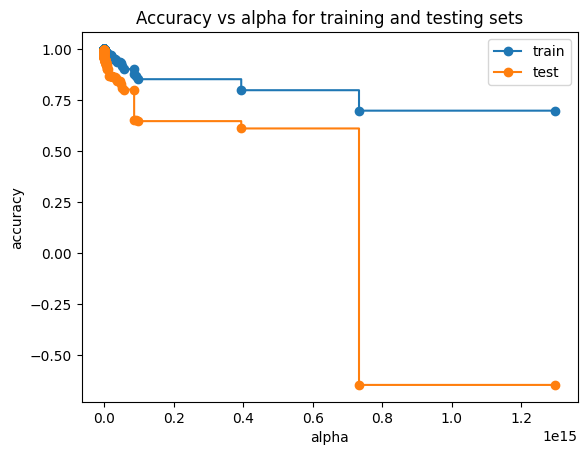

In [2665]:
print("Pruning plots for Random Undersampling on scaled data")
dt_prune_scaled_under = prune_algo(X_train_scaled_under, Y_train_scaled_under, X_test_scaled, Y_test)

print("Pruning plots for Random Oversampling on scaled data")
dt_prune_scaled_over=prune_algo(X_train_scaled_over, Y_train_scaled_over, X_test_scaled, Y_test)


print("Pruning plots for Random Undersampling on unscaled data")
dt_prune_unscaled_under =  prune_algo(X_train_unscaled_under, Y_train_unscaled_under, X_test_unscaled, Y_test)

print("Pruning plots for Random Oversampling on unscaled data")
dt_prune_unscaled_over = prune_algo(X_train_unscaled_over, Y_train_unscaled_over, X_test_unscaled, Y_test)

In [2683]:
# print("Results for Pruned Decision Tree on Random Undersampling on scaled data")
# results(dt_prune_scaled_under, X_test_scaled, Y_test)

# print("Results for Pruned Decision Tree on Random Oversampling on scaled data")
# results(dt_prune_scaled_over, X_test_scaled, Y_test)

# print("Results for Pruned Decision Tree on Random Undersampling on unscaled data")
# results(dt_prune_unscaled_under, X_test_unscaled, Y_test)

# print("Results for Pruned Decision Tree on Random Oversampling on unscaled data")
# results(dt_prune_unscaled_over, X_test_unscaled, Y_test)

Task 4: Handling Overfitting:

Cross Validation Results for Random Undersampling
Cross Validation RMSE:  [20437864.75612053 13264320.55037716 10349303.99756634 17895387.49558168
 67430115.123229  ]
Mean RMSE:  25875398.384574942


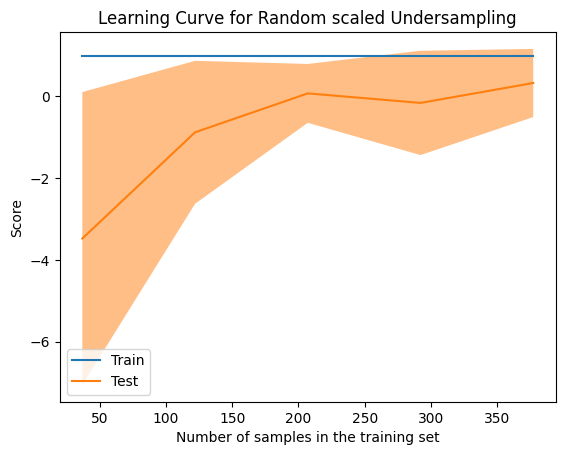

Cross Validation Results for Random Oversampling
Cross Validation RMSE:  [2498568.39738239 1268875.43862748       0.               0.
       0.        ]
Mean RMSE:  753488.7672019735


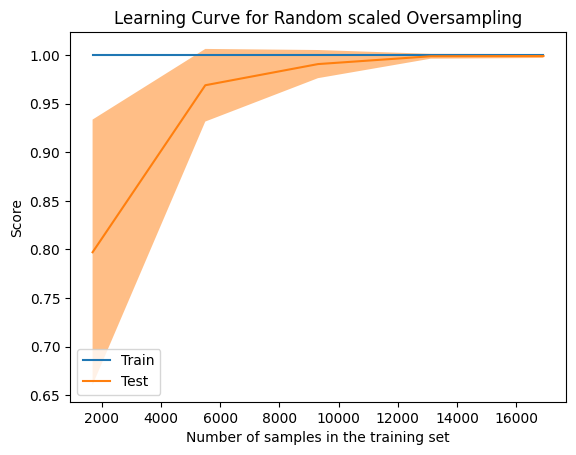

Cross Validation Results for Random Undersampling on unscaled data
Cross Validation RMSE:  [22844100.93149698  8573359.88611478 11915359.78376632 20118901.87773571
 58174239.38187396]
Mean RMSE:  24325192.37219755


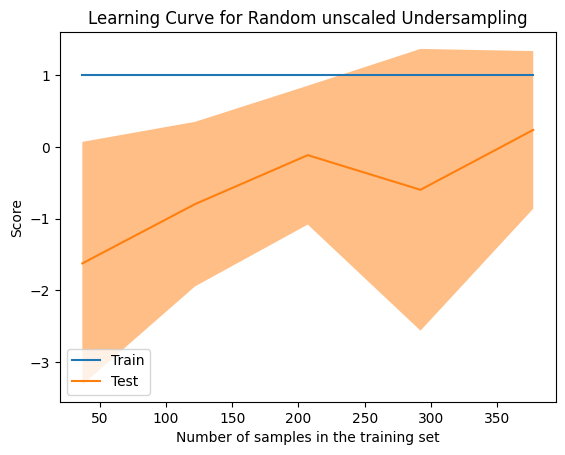

Cross Validation Results for Random Oversampling on unscaled data
Cross Validation RMSE:  [2368167.31679192 1289143.49496194       0.               0.
       0.        ]
Mean RMSE:  731462.1623507725


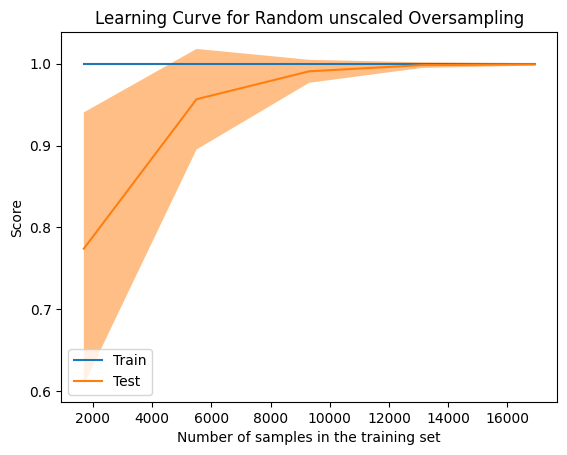

In [2672]:


def learning_curve_display(model,X_train, Y_train,title):
    
    LearningCurveDisplay.from_estimator(model, X_train, Y_train, cv=5)
    plt.title(title)
    plt.show()

def cross_validation(model, X_train, Y_train):
    # kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring = 'neg_mean_squared_error'
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring=scoring)
    # print(scores)
    cv_rmse = np.sqrt(-scores)
    print("Cross Validation RMSE: ", cv_rmse)
    print("Mean RMSE: ", cv_rmse.mean())


print("Cross Validation Results for Random Undersampling")
cross_validation(dt1, X_train_scaled_under, Y_train_scaled_under)
learning_curve_display(dt1, X_train_scaled_under, Y_train_scaled_under, 'Learning Curve for Random scaled Undersampling')


print("Cross Validation Results for Random Oversampling")
cross_validation(dt2, X_train_scaled_over, Y_train_scaled_over)
learning_curve_display(dt2, X_train_scaled_over, Y_train_scaled_over, 'Learning Curve for Random scaled Oversampling')


print("Cross Validation Results for Random Undersampling on unscaled data")
cross_validation(dt1_unscaled, X_train_unscaled_under, Y_train_unscaled_under)
learning_curve_display(dt1_unscaled, X_train_unscaled_under, Y_train_unscaled_under, 'Learning Curve for Random unscaled Undersampling')

print("Cross Validation Results for Random Oversampling on unscaled data")
cross_validation(dt2_unscaled, X_train_unscaled_over, Y_train_unscaled_over)
learning_curve_display(dt2_unscaled, X_train_unscaled_over, Y_train_unscaled_over, 'Learning Curve for Random unscaled Oversampling')


# Q4

Task 1: Model Evaluation:

In [2673]:
#fine tuned model

print("Fine tuned model evaluations on test data--------------------------------")

print("Random Undersampling on scaled data")
results(best_dt_regressor1,X_train_scaled_under,Y_train_scaled_under)
results(best_dt_regressor1,X_test_scaled,Y_test)
print()

print("Random Oversampling on scaled data")
results(best_dt_regressor2,X_train_scaled_over,Y_train_scaled_over)
results(best_dt_regressor2,X_test_scaled,Y_test)
print()

print("Random Undersampling on unscaled data")
results(best_dt_regressor1_unscaled,X_train_unscaled_under,Y_train_unscaled_under)
results(best_dt_regressor1_unscaled,X_test_unscaled,Y_test)
print()

print("Random Oversampling on unscaled data")
results(best_dt_regressor2_unscaled,X_train_unscaled_over,Y_train_unscaled_over)
results(best_dt_regressor2_unscaled,X_test_unscaled,Y_test)
print()

Fine tuned model evaluations on test data--------------------------------
Random Undersampling on scaled data
Mean Squared Error:  116496637112288.14
Mean Absolute Error:  3239748.5875706216
R2 Score:  0.9843950836975179
Mean Squared Error:  88296769737691.81
Mean Absolute Error:  4471875.639386189
R2 Score:  0.9244208809206479

Random Oversampling on scaled data
Mean Squared Error:  23.638426626323753
Mean Absolute Error:  0.0472768532526475
R2 Score:  0.9999999999999968
Mean Squared Error:  8267053752557.545
Mean Absolute Error:  1017783.2480818414
R2 Score:  0.992923674989967

Random Undersampling on unscaled data
Mean Squared Error:  5009721319193.52
Mean Absolute Error:  946198.9818091511
R2 Score:  0.999319502986789
Mean Squared Error:  47702386913462.17
Mean Absolute Error:  3922881.8283166112
R2 Score:  0.9591683320736153

Random Oversampling on unscaled data
Mean Squared Error:  117020375341.64311
Mean Absolute Error:  57478.71335149135
R2 Score:  0.9999840213337164
Mean Squar

Task 2 : Residual and Error Analysis

In [2674]:
def residuals_plot(model, X_test, Y_test,title):
    Y_pred = model.predict(X_test)
    residuals = Y_test - Y_pred
    plt.scatter(Y_test, residuals)
    plt.xlabel('Price')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Price '+title)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

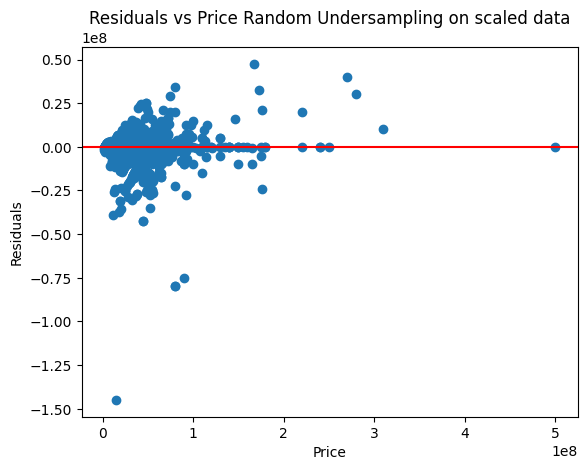

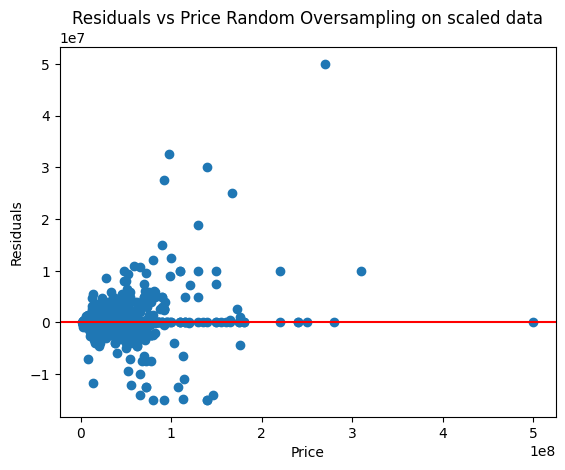

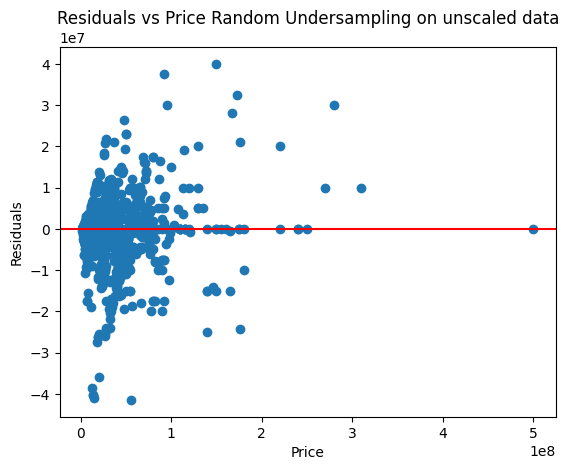

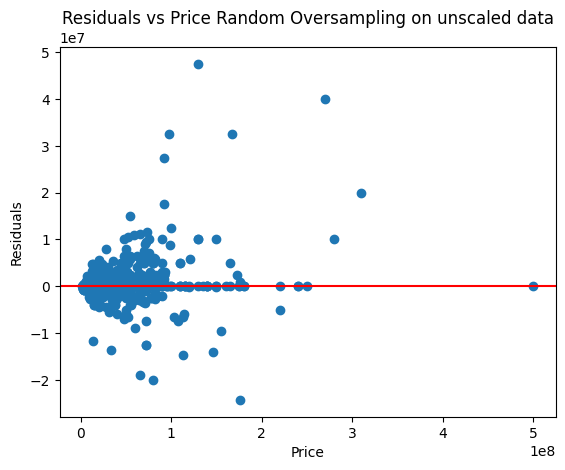

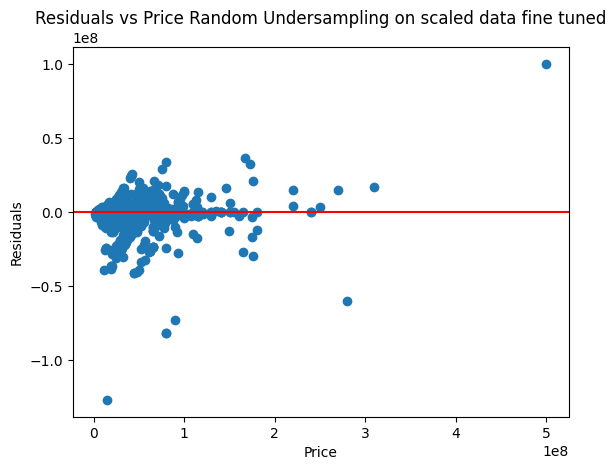

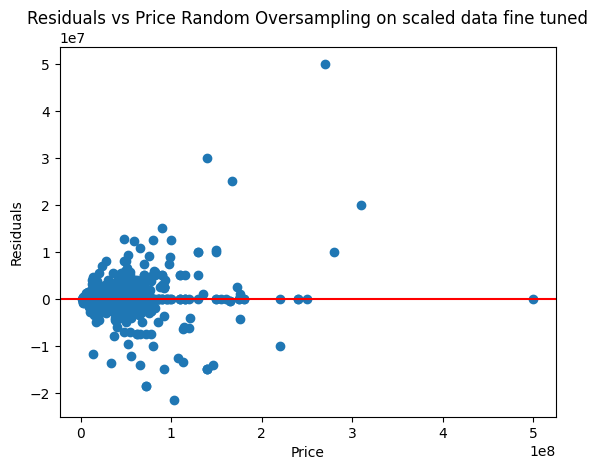

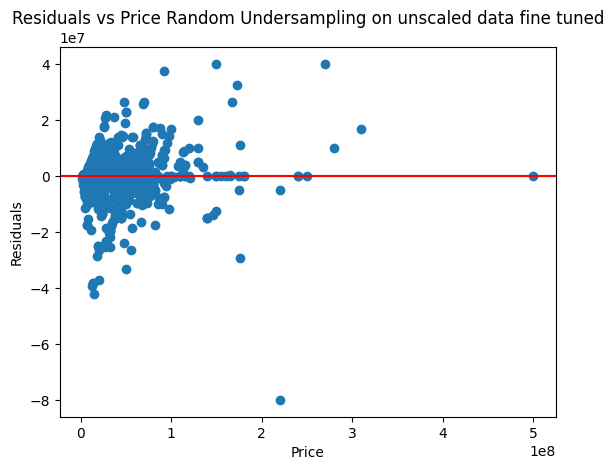

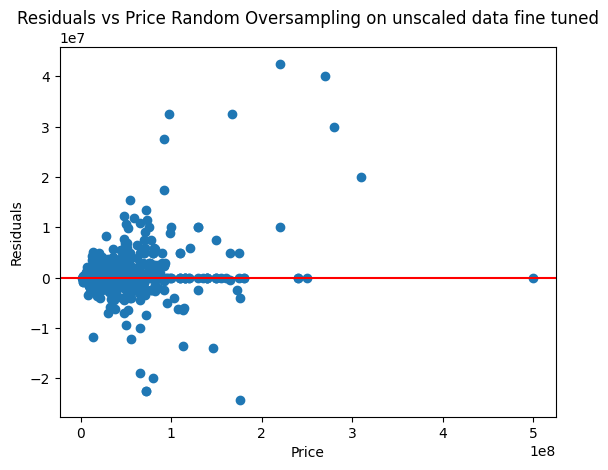

In [2675]:
#residuals for base models:
residuals_plot(dt1, X_test_scaled, Y_test, 'Random Undersampling on scaled data')

residuals_plot(dt2, X_test_scaled, Y_test, 'Random Oversampling on scaled data')

residuals_plot(dt1_unscaled, X_test_unscaled, Y_test, 'Random Undersampling on unscaled data')

residuals_plot(dt2_unscaled, X_test_unscaled, Y_test, 'Random Oversampling on unscaled data')

#residuals for fine tuned models:

residuals_plot(best_dt_regressor1, X_test_scaled, Y_test, 'Random Undersampling on scaled data fine tuned')

residuals_plot(best_dt_regressor2, X_test_scaled, Y_test, 'Random Oversampling on scaled data fine tuned')

residuals_plot(best_dt_regressor1_unscaled, X_test_unscaled, Y_test, 'Random Undersampling on unscaled data fine tuned')

residuals_plot(best_dt_regressor2_unscaled, X_test_unscaled, Y_test, 'Random Oversampling on unscaled data fine tuned')


Task 3 : Feature Importance based analysis:

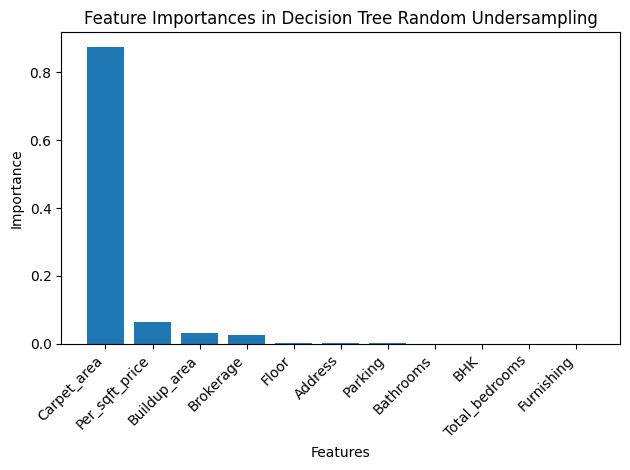

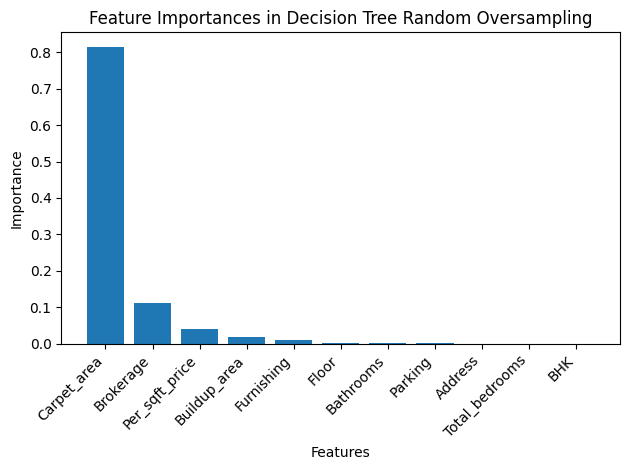

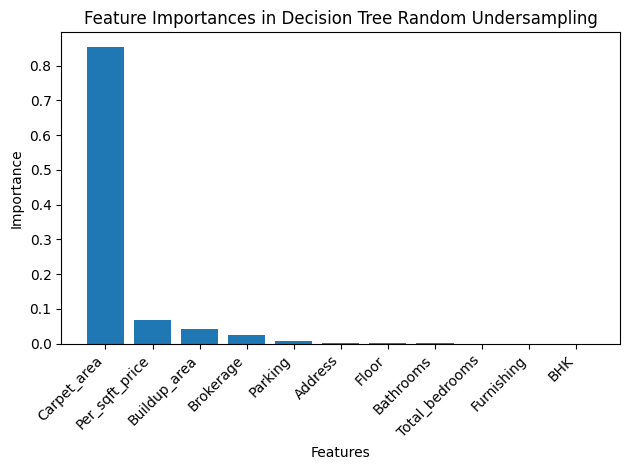

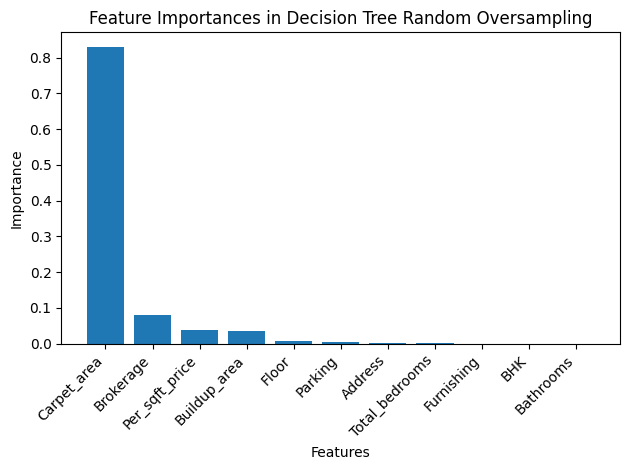

In [2676]:
feature_importance_plot(best_dt_regressor1, 'Random Undersampling')
feature_importance_plot(best_dt_regressor2, 'Random Oversampling')

feature_importance_plot(best_dt_regressor1_unscaled, 'Random Undersampling')
feature_importance_plot(best_dt_regressor2_unscaled, 'Random Oversampling')

In [2677]:
print("RMSE for Random Undersampling: ", np.sqrt(mean_squared_error(Y_test, best_dt_regressor1.predict(X_test_scaled))))

print("RMSE for Random Oversampling: ", np.sqrt(mean_squared_error(Y_test, best_dt_regressor2.predict(X_test_scaled))))

print("RMSE for Random Undersampling on unscaled data: ", np.sqrt(mean_squared_error(Y_test, best_dt_regressor1_unscaled.predict(X_test_unscaled))))

print("RMSE for Random Oversampling on unscaled data: ", np.sqrt(mean_squared_error(Y_test, best_dt_regressor2_unscaled.predict(X_test_unscaled))))

RMSE for Random Undersampling:  9396636.08626469
RMSE for Random Oversampling:  2875248.4679689067
RMSE for Random Undersampling on unscaled data:  6906691.459263413
RMSE for Random Oversampling on unscaled data:  3194953.7411241555


# 5. Bonus Challenge

Task 1:Advanced Imbalance Handling

In [ ]:
def smote(X_train, Y_train):
    X_train_df = pd.DataFrame(X_train, columns=[f'Feature{i}' for i in range(X_train.shape[1])])
    
    X_train_new = pd.concat([X_train_df, Y_train.reset_index(drop=True)], axis=1)

    Y_train_categories = categorize(Y_train)
    smote = SMOTE()
    X_train_smote, Y_train_smote = smote.fit_resample(X_train_new, Y_train_categories)
    return X_train_smote, Y_train_smote

In [ ]:
def adasyn(X_train, Y_train):
    X_train_df = pd.DataFrame(X_train, columns=[f'Feature{i}' for i in range(X_train.shape[1])])
    
    X_train_new = pd.concat([X_train_df, Y_train.reset_index(drop=True)], axis=1)

    Y_train_categories = categorize(Y_train)
    adasyn = ADASYN()
    X_train_adasyn, Y_train_adasyn = adasyn.fit_resample(X_train_new, Y_train_categories)
    return X_train_adasyn, Y_train_adasyn

In [2680]:
X_train_scaled.shape, X_train_unscaled.shape

((6256, 11), (6256, 11))

In [2681]:
X_train_scaled_smote, Y_train_scaled_smote = smote(X_train_scaled, Y_train)
Y_train_scaled_smote = X_train_scaled_smote['Price']
X_train_scaled_smote = X_train_scaled_smote.drop(['Price'], axis = 1)
X_train_scaled_smote = X_train_scaled_smote.to_numpy()


print("Decision Tree Regressor Results for SMOTE on scaled data")
dt3 = DecisionTreeRegressor()
dt3.fit(X_train_scaled_smote, Y_train_scaled_smote)
results(dt3, X_test_scaled, Y_test)
print()



X_train_scaled_adasyn, Y_train_scaled_adasyn = adasyn(X_train_unscaled, Y_train)
Y_train_scaled_adasyn = X_train_scaled_adasyn['Price']
X_train_scaled_adasyn = X_train_scaled_adasyn.drop(['Price'], axis = 1)
X_train_scaled_adasyn = X_train_scaled_adasyn.to_numpy()

print("Decision Tree Regressor Results for ADASYN on scaled data")
dt4 = DecisionTreeRegressor()
dt4.fit(X_train_scaled_adasyn, Y_train_scaled_adasyn)
results(dt4, X_test_unscaled, Y_test)


Decision Tree Regressor Results for SMOTE on scaled data
Mean Squared Error:  29786870062174.71
Mean Absolute Error:  1116405.4539641943
R2 Score:  0.9745034228758509

Decision Tree Regressor Results for ADASYN on scaled data
Mean Squared Error:  26578178900280.145
Mean Absolute Error:  1351326.2212276214
R2 Score:  0.9772499565501194


In [2682]:

print("Decision Tree Regressor Results on scaled data")
dt_ini = DecisionTreeRegressor()
dt_ini.fit(X_train_scaled, Y_train)
results(dt_ini, X_test_scaled, Y_test)

print()

print("Random Forest Regressor Results on scaled data")
rf_ini = RandomForestRegressor()
rf_ini.fit(X_train_scaled, Y_train)
results(rf_ini, X_test_scaled, Y_test)




Decision Tree Regressor Results on scaled data
Mean Squared Error:  8301359166879.795
Mean Absolute Error:  900944.3734015345
R2 Score:  0.9928943106881717

Random Forest Regressor Results on scaled data
Mean Squared Error:  9392492711036.836
Mean Absolute Error:  685472.1334185848
R2 Score:  0.991960336406776
